# **Part 2: Apply to a New Dataset**

## **Importing Required Libraries**


In [5]:
# Importing necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For handling datasets
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.preprocessing import LabelBinarizer, StandardScaler  # For preprocessing data
from sklearn.metrics import classification_report, ConfusionMatrixDisplay  # For evaluating model performance
import tensorflow as tf  # For building and training the neural network
from tensorflow.keras.models import Sequential  # Sequential model API in Keras
from tensorflow.keras.layers import Dense  # Fully connected layers in Keras
import matplotlib.pyplot as plt  # For visualizations

# Ensuring reproducibility by setting random seeds
np.random.seed(42)
tf.random.set_seed(42)


# **Step 1: Load and Preprocess the Wine Dataset**

In [7]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data  # Features
y_wine = wine.target  # Target labels
wine_target_names = wine.target_names  # Class names

# Standardize the features
scaler = StandardScaler()  # Initialize scaler
X_wine_scaled = scaler.fit_transform(X_wine)  # Standardize features

# One-hot encode the target labels
encoder = LabelBinarizer()  # Initialize label encoder
y_wine_encoded = encoder.fit_transform(y_wine)  # Encode labels

# Split the dataset into training and testing sets
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(
    X_wine_scaled, y_wine_encoded, test_size=0.3, random_state=42)

# Print dataset information
print(f"Wine Dataset: {X_wine_train.shape[0]} training samples, {X_wine_test.shape[0]} testing samples")


Wine Dataset: 124 training samples, 54 testing samples


# **Step 2: Build the Neural Network**

In [8]:
# Build the neural network for the Wine dataset
wine_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_wine_train.shape[1],), name="Hidden_Layer_1"),  # First hidden layer
    Dense(16, activation='relu', name="Hidden_Layer_2"),  # Second hidden layer
    Dense(y_wine_train.shape[1], activation='softmax', name="Output_Layer")  # Output layer
])

# Compile the model
wine_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Display model summary
wine_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307 (1.20 KB)

 Trainable params: 307 (1.20 KB)

 Non-trainable params: 0 (0.00 B)

# **Step 3: Train the Model**
Training and Validation Loss/Accuracy.

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2699 - loss: 1.1687 - val_accuracy: 0.2800 - val_loss: 1.2074
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3309 - loss: 1.1105 - val_accuracy: 0.3600 - val_loss: 1.1584
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4168 - loss: 1.0665 - val_accuracy: 0.4000 - val_loss: 1.1164
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4502 - loss: 1.0286 - val_accuracy: 0.4000 - val_loss: 1.0755
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4640 - loss: 0.9935 - val_accuracy: 0.4400 - val_loss: 1.0392
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5060 - loss: 0.9587 - val_accuracy: 0.4400 - val_loss: 1.0066
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5607 - loss: 0.9231 - val_accuracy: 0.4400 - val_loss: 0.9751
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5637 - loss: 0.8856 - val_accuracy: 0.5200 - val_loss

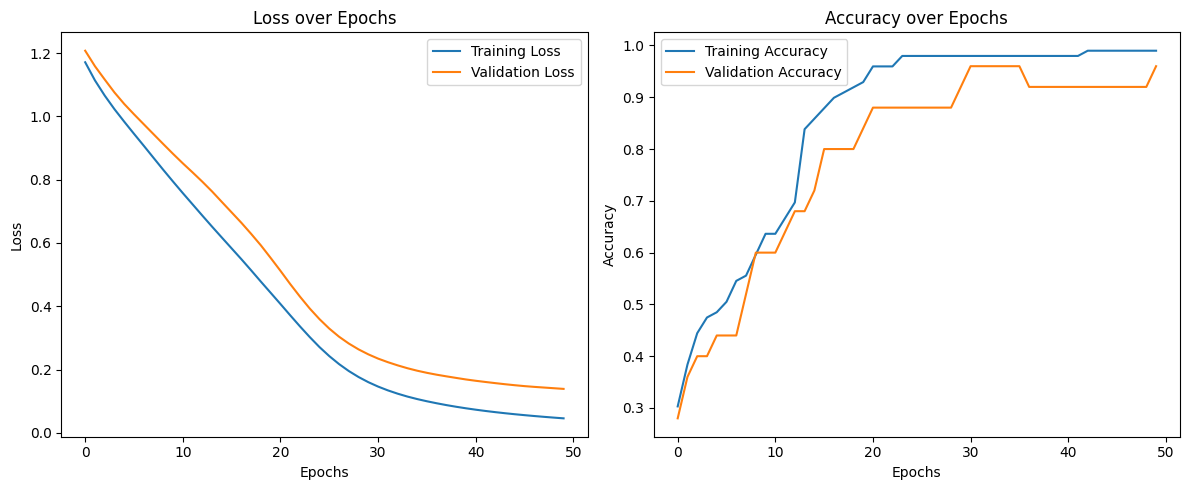

In [9]:

# Train the model
history = wine_model.fit(X_wine_train, y_wine_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Plot training history
plt.figure(figsize=(12, 5))  # Set figure size

# Loss plot
plt.subplot(1, 2, 1)  # First subplot for loss
plt.plot(history.history['loss'], label='Training Loss')  # Training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation loss
plt.title('Loss over Epochs')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend()  # Display legend

# Accuracy plot
plt.subplot(1, 2, 2)  # Second subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.title('Accuracy over Epochs')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend()  # Display legend

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plots


# **Step 4: Evaluate**
Evaluate the model on the test data and visualize the confusion matrix.

Test Loss (Wine Model): 0.1155, Test Accuracy: 0.9815
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Classification Report (Wine Model):
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



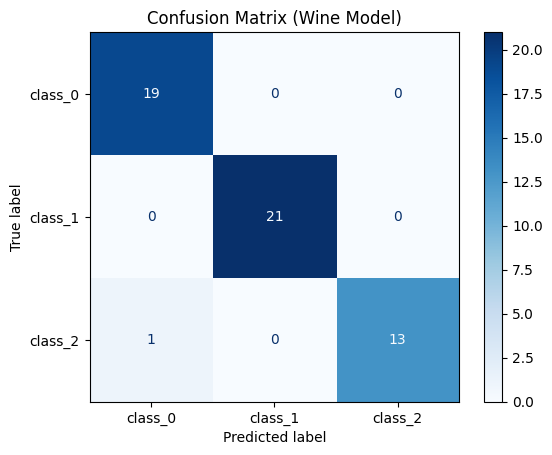

In [10]:
# Evaluate the model on test data
wine_test_loss, wine_test_accuracy = wine_model.evaluate(X_wine_test, y_wine_test, verbose=0)
print(f"Test Loss (Wine Model): {wine_test_loss:.4f}, Test Accuracy: {wine_test_accuracy:.4f}")

# Generate predictions for test data
wine_y_pred = wine_model.predict(X_wine_test)
wine_y_pred_classes = np.argmax(wine_y_pred, axis=1)
wine_y_true_classes = np.argmax(y_wine_test, axis=1)

# Print classification report
print("Classification Report (Wine Model):")
print(classification_report(wine_y_true_classes, wine_y_pred_classes, target_names=wine_target_names))

# Visualize confusion matrix
ConfusionMatrixDisplay.from_predictions(wine_y_true_classes, wine_y_pred_classes, display_labels=wine_target_names, cmap="Blues")
plt.title("Confusion Matrix (Wine Model)")
plt.show()


# **Step 5: Visualize**

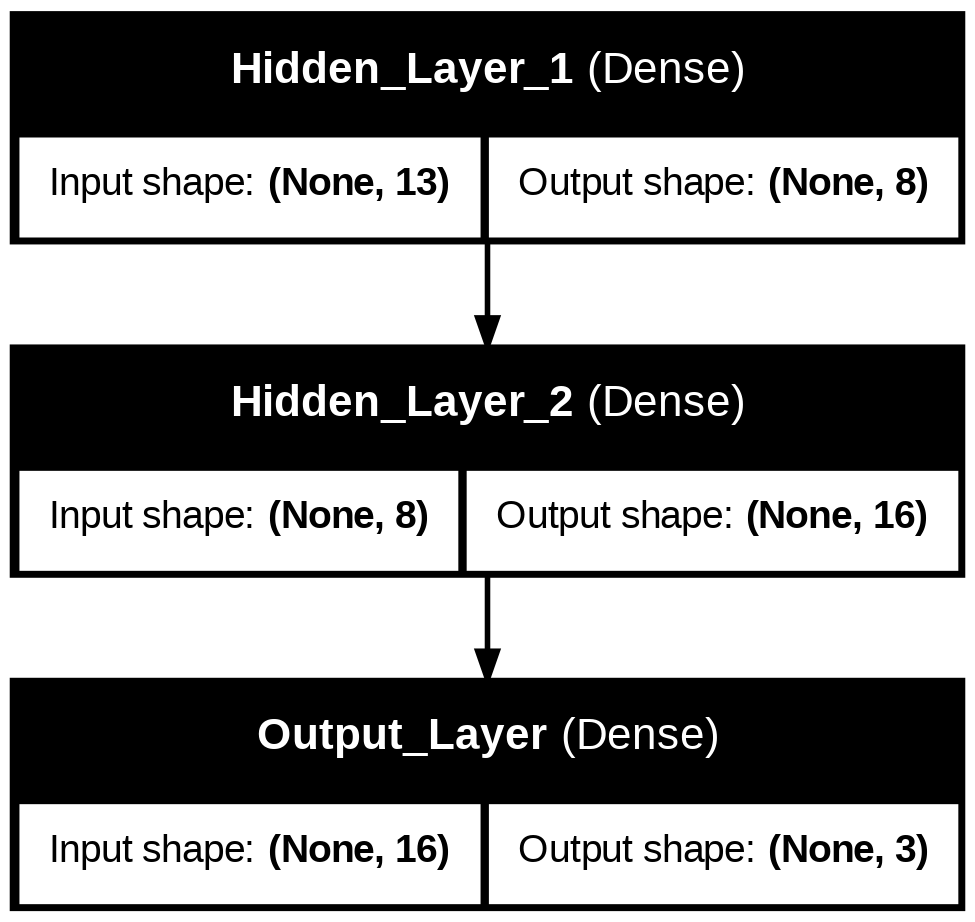

In [13]:

# Visualize the model architecture
from tensorflow.keras.utils import plot_model  # Utility to plot model architecture

# Save the architecture plot
plot_model(wine_model, show_shapes=True, show_layer_names=True, to_file='model_architecture.png')  # Save as PNG

# Display the saved image
from IPython.display import Image
Image(filename='model_architecture.png')
